# Min Han SOE (AIBT 2023-2024)

In [1]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

#Code provided by professor
def plot_decision_boundaries(clf, x_train, y_train, X, y, x1=0, x2=1):
    '''
    Example of using it : plot_decision_boundaries(knn1, X_train, X_test, y_train, y_test, x1=0, x2=2)
    if clf is your own model, has to have predict function
    '''
    if not isinstance(X, pd.DataFrame):
        raise TypeError('X must be a dataframe')
    #try:
    le = LabelEncoder()
    y = le.fit_transform(y)
    y_train = le.transform(y_train)
        
    clf.fit(x_train.iloc[:,[x1, x2]], y_train)

    classnames=np.unique(y)
    column_names = X.columns
    space = 0.02
    threshold = 0.1
    x_min,  x_max  =  X.iloc[:,  x1].min()-threshold,  X.iloc[:,  x1].max()+threshold
    y_min,  y_max  =  X.iloc[:,  x2].min()-threshold,  X.iloc[:,  x2].max()+threshold
    xx,  yy  =  np.meshgrid(np.arange(x_min,  x_max,  space), np.arange(y_min,  y_max,  space))
    Y  =  np.array(clf.predict(np.c_[xx.ravel(),  yy.ravel()]))
    Y  =  Y.reshape(xx.shape)


    colors_ = ('yellow','grey','blue','green','red','magenta','orange')
    colors_2 = ('#FFFB00', '#C7C7C7', '#00AEFF', '#2EFF00', '#FF0000', '#E000FF' , '#FFA600')
    # Create the colormap
    cm = ListedColormap(colors_[0:1+len(np.unique(y))])
    cm2 = ListedColormap(colors_2[0:1+len(np.unique(y))])
    colors_3 = [colors_2[i] for i in range(len(np.unique(y))-1)]
    colors_3.append(colors_2[len(np.unique(y))])
    #cm3 = ListedColormap(colors_3)
    cm3 = ListedColormap(colors_2)
    print(colors_2)
    print(colors_3)
    contour = plt.contour(xx, yy, Y)
    plt.contourf(xx,  yy,  Y,  alpha=0.8, cmap=cm2)# cmap=plt.cm.RdYlBu)


    for i in np.unique(y):
        mask = y == i
        plt.scatter(X.iloc[:, x1][mask], X.iloc[:, x2][mask], c=cm3(i), label=list(classnames)[i], edgecolors='k', alpha=0.8)

    plt.xlabel('{}'.format(column_names[x1]))
    plt.ylabel('{}'.format(column_names[x2]))

    plt.legend()
    #plt.xlim(xx.min()-1,  xx.max()+1)
    #plt.ylim(yy.min()-1,  yy.max()+1)
    plt.xlim(xx.min()-threshold,  xx.max()+threshold)
    plt.ylim(yy.min()-threshold,  yy.max()+threshold)
    plt.show()


In [2]:
#Read csv file and assign it to df variable
df = pd.read_csv("penguins.csv")

In [3]:
#Print first 5 lines of the dataframe
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [4]:
#Assigning variable X as descriptors and y as the variable to predict
X = df[['culmen_length_mm','culmen_depth_mm','flipper_length_mm', 'body_mass_g']]
y = df['species']

In [5]:
#Splitting data frame into 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.20, random_state=42, stratify=y)

# Question 1(a)
a) Display training and test data with appropriate scatter plots. Determine the size of the examples, the number of learning and test examples.



Looking at the plots we can clearly see that the dataframe is divided into two parts 80% in the training set and 20% in the testing set

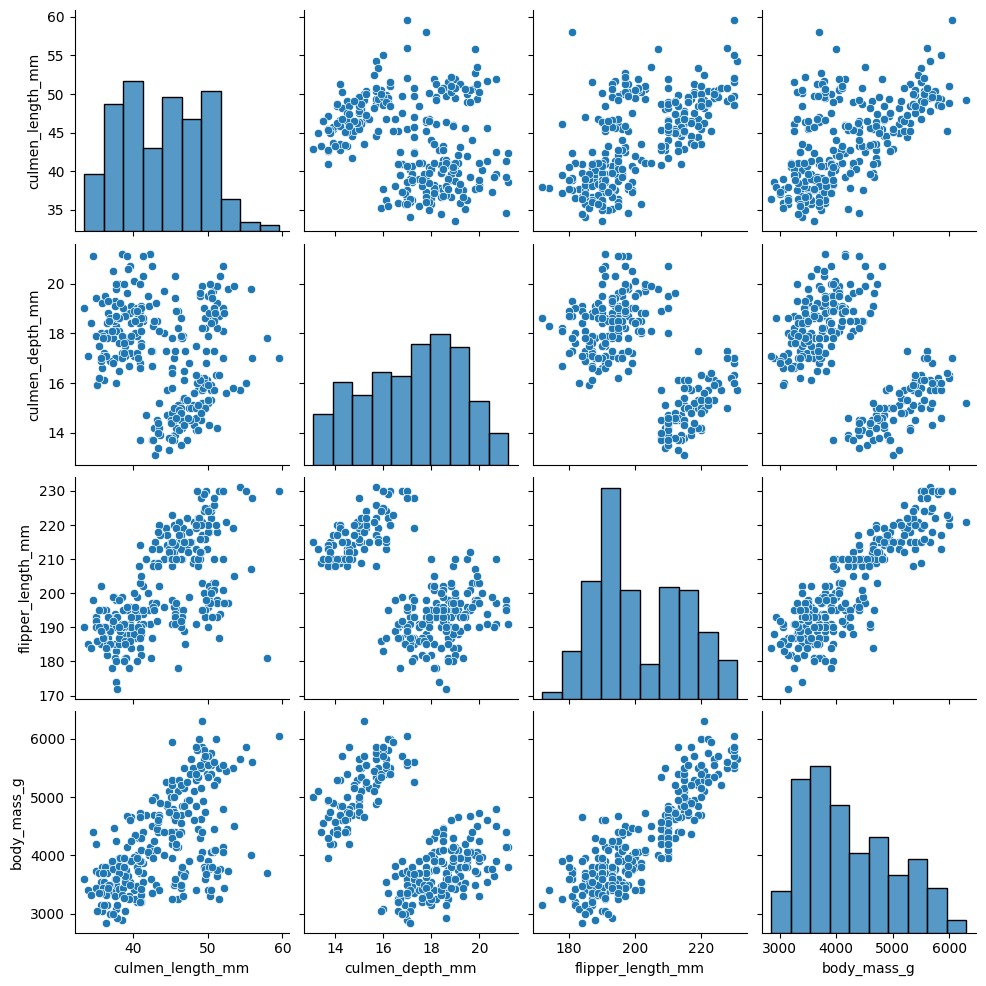

In [6]:
#Plotting the whole training dataset using seaborn pairplot
sns.pairplot(X_train)

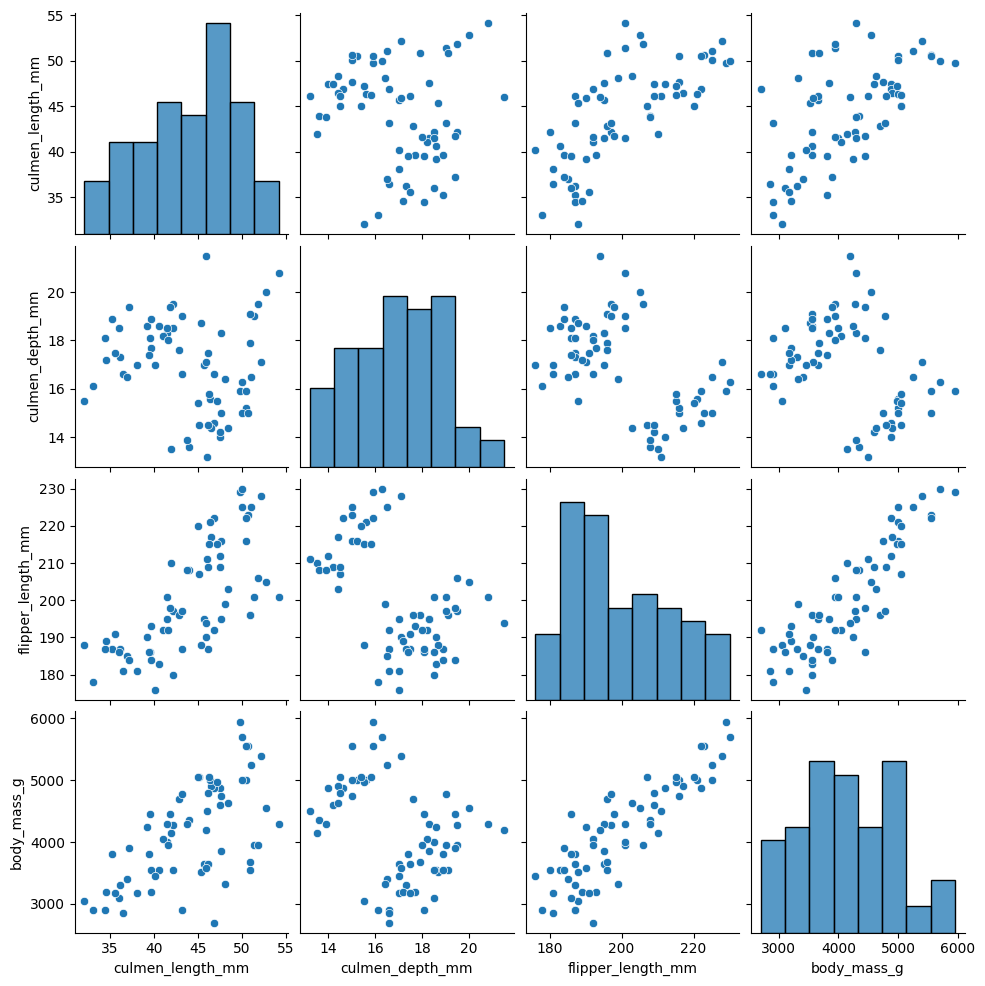

In [7]:
#Plotting the whole testing dataset using seaborn pairplot
sns.pairplot(X_test)

# Question 1(b)

b) Determine the number of classes of the problem.

In [8]:
#Using nunique to find number of unique value in the 'species' column
num_of_classes = df['species'].nunique()

In [9]:
print(f"The number of classes of the problem is: {num_of_classes}")

The number of classes of the problem is: 3


# Question 2(a)
a) Test the knn algorithm with k=1, which uses the learning base (data_app) to classify the test base (data_tst). It returns a class vector containing the class of the closest neighbor of the test base examples.

Training KNN model with k = 1

In [10]:
knn = KNeighborsClassifier(n_neighbors=1)

In [11]:
knn.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=1)

# Question 2(b)
Use this result for :

- Evaluate the recognition rate

- Determine the confusion matrix

- Displaying decision boundaries (plot_decision_boundaries function).

In [12]:
pred = knn.predict(X_test)

In [13]:
score = knn.score(X_test, y_test).round(2)


In [14]:
print(f"The accuracy is:{score*100}% ")

The accuracy is:81.0% 


In [15]:
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
cm = (confusion_matrix(y_test,pred))
cm

array([[25,  2,  2],
       [ 5,  8,  1],
       [ 2,  1, 21]])

In [17]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      Adelie       0.78      0.86      0.82        29
   Chinstrap       0.73      0.57      0.64        14
      Gentoo       0.88      0.88      0.88        24

    accuracy                           0.81        67
   macro avg       0.79      0.77      0.78        67
weighted avg       0.80      0.81      0.80        67



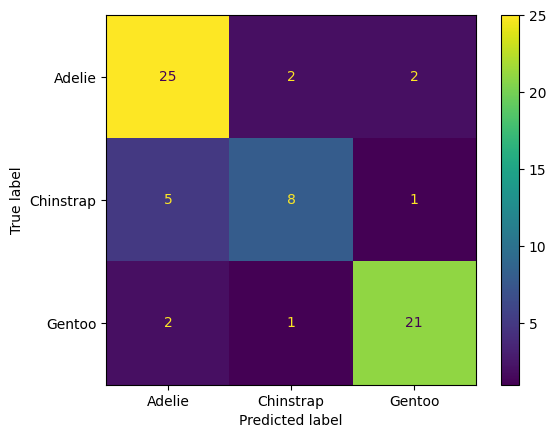

In [18]:
#Plotting the Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay (confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


('#FFFB00', '#C7C7C7', '#00AEFF', '#2EFF00', '#FF0000', '#E000FF', '#FFA600')
['#FFFB00', '#C7C7C7', '#2EFF00']


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


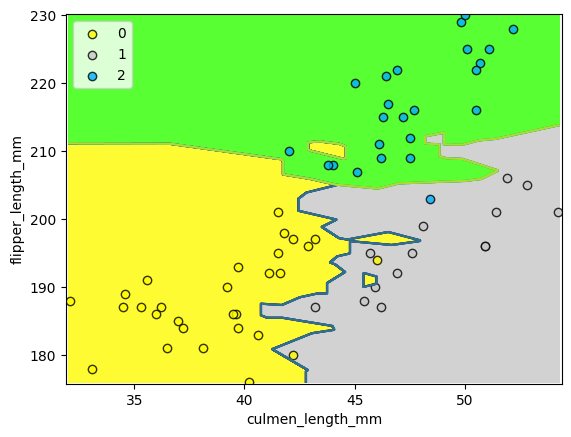

In [19]:
#Plotting decision boundaries
plot_decision_boundaries(knn, X_train, y_train, X_test, y_test, x1=0, x2=2)

# Question 3(a)
a) Using the whole test base, write a script for :

 Create a learning base data_app_bis, whose size varies from 1% to 100% of data_app.

 Use this database to classify the complete test database data_tst. Store the recognition rate .

 Display the evolution of the recognition rate as a by the number of training data  Explain the influence of the number of training examples on recognition rate and classification time.

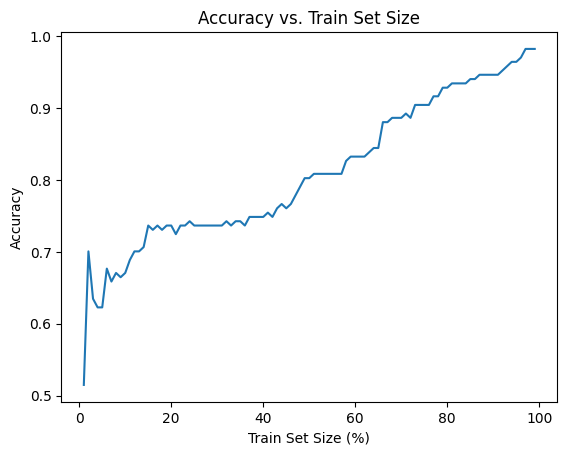

In [20]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.5, stratify=y, random_state=12)

accuracy_results = []
for i in range(1,100):
    X_train_bis, X_test_bis, y_train_bis, y_test_bis = train_test_split(X, y, train_size=i/100, stratify=y, random_state=12)
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train_bis, y_train_bis)
    accuracy_i = knn.score(X_test_3, y_test_3)
    accuracy_results.append(accuracy_i)

plt.plot(range(1,100), accuracy_results)
plt.xlabel('Train Set Size (%)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Train Set Size')
plt.show()

Explanation <-
Since the training size is too small at the start there is not enough data for the alogrithmn to identify the classes which is the case of underfitting.

# Question 3(b)
b) Using the entire learning base, write a script for : 

Create a test base data_tst_bis, whose size varies from 1% to 100% of data_tst.

Use the complete learning base data_app to classify the data_tst_bis database. Store therecognition rate in a vector.

Display the evolution of the recognition rate according to the number of test examples (plot function).

Explain the influence of the number of test examples on the recognition rate and the classification time.

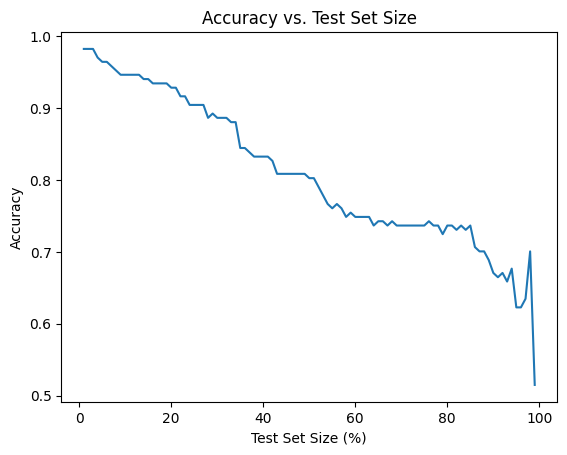

In [21]:
accuracy_results = []
for i in range(1,100):
    X_train_bis, X_test_bis, y_train_bis, y_test_bis = train_test_split(X, y, test_size=i/100, stratify=y, random_state=12)
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train_bis, y_train_bis)
    accuracy_i = knn.score(X_test_3, y_test_3)
    accuracy_results.append(accuracy_i)

plt.plot(range(1,100), accuracy_results)
plt.xlabel('Test Set Size (%)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Test Set Size')
plt.show()

Explanation
Since the test size is too small at the start the model can predict pretty much a 100% at the start and slowly decrease in accuracy when the test size getting bigger which mean not enough data to train. To conclude, the optimal range of train test split range from 80/20 to 70/30.

# Question 5(a)
Take the initial data and separate it into two parts: 80% for the learning base and 20% for the test base.

a) Observe parameter k's influence on recognition rate: plot the graph (recognition rate as a function of k).



In [22]:
#80/20 splitting of dataset
X_train2, X_test2, y_train2, y_test2 = train_test_split(X ,y, test_size=0.20, stratify=y)

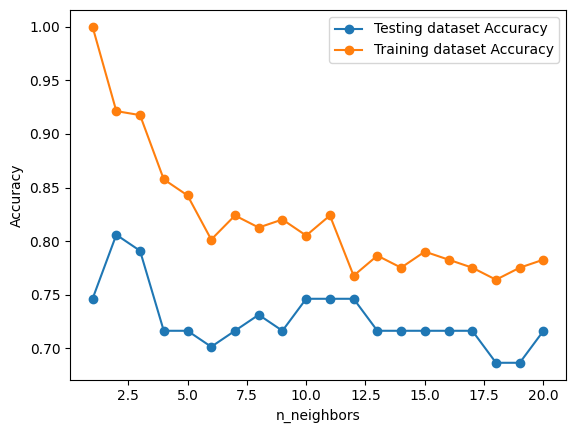

In [23]:
#Assign variables as empty list
train_accuracy = []
test_accuracy = []
#Loop over K values
for i in range(1, 21):
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1.fit(X_train2, y_train2)
      
    #Compute training and test data accuracy
    train_accuracy.append(knn1.score(X_train2, y_train2))
    test_accuracy.append(knn1.score(X_test2, y_test2))
  
#Plotting both variables with a line plot
plt.plot(range(1, 21), test_accuracy, label = 'Testing dataset Accuracy', marker='o')
plt.plot(range(1, 21), train_accuracy, label = 'Training dataset Accuracy', marker='o')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

We can see from the plot that accuracy is highest when the k number is 1

# Question 5(b)
b) Give the optimal value of k. Plot the boundaries for this value.

Optimal K number is 1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


('#FFFB00', '#C7C7C7', '#00AEFF', '#2EFF00', '#FF0000', '#E000FF', '#FFA600')
['#FFFB00', '#C7C7C7', '#2EFF00']


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


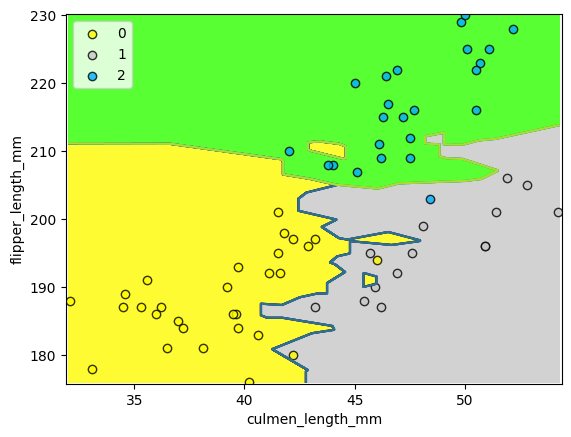

In [24]:
#Plotting decision boundaries of Optimal K number
plot_decision_boundaries(knn, X_train, y_train, X_test, y_test, x1=0, x2=2)

# Question 6(a)

a. Use the sklearn standard scaler to rescale the dataset

In [25]:
#Import standard scaler from sklearn
from sklearn.preprocessing import StandardScaler

In [26]:
#create a scaler object
scalar = StandardScaler()

In [27]:
#scale the X_train
X_train_scaled = scalar.fit_transform(X_train)

In [28]:
#scale the X_test
X_test_scaled = scalar.transform(X_test)

# Question 6(b)


b. Use a boxplot to compare the original data and the scaled dataset





<AxesSubplot: >

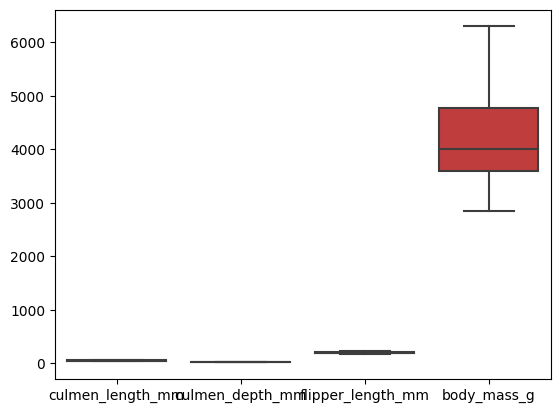

In [29]:
#Plotting the unscaled dataset
sns.boxplot(X_train)

According to the box plot the body_mass_g column contains values much higher than the other 3 features which is why scaling the data can be an advantage for the KNN model so that the values are close to each other.

<AxesSubplot: >

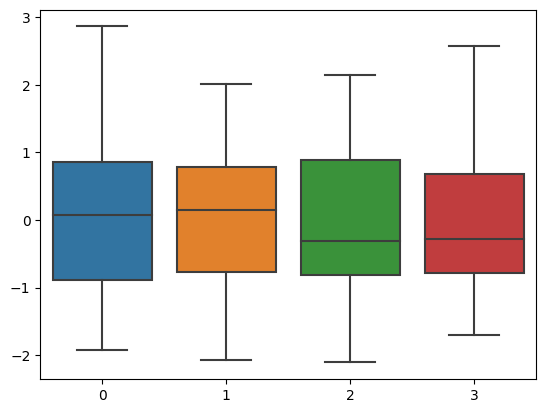

In [30]:
#Plotting the scaled dataset
sns.boxplot(X_train_scaled)

# Question 6(c)
c. Test the performances of the KNN on the scaled dataset and compare it to the unscaled dataset performances

In [31]:
#Performance of the unscaled data
knn3 = KNeighborsClassifier(n_neighbors=1)
knn3.fit(X_train, y_train)
pred_3 = knn3.predict(X_test)
score = knn3.score(X_test, y_test)

print(f"The accuracy unscaled dataset is:{score}")

The accuracy unscaled dataset is:0.8059701492537313


In [32]:
#Performance of the scaled data
knn4 = KNeighborsClassifier(n_neighbors=1)
knn4.fit(X_train_scaled, y_train)
pred_1 = knn4.predict(X_test_scaled)
accuracy2 = knn4.score(X_test_scaled, y_test)

print(f"The accuracy of scaled dataset is:{accuracy2}")

The accuracy of scaled dataset is:1.0


# Question 6(d)
d. Conclude

Conclusion:
    Training with scaled data is better than training with unscaled data because in the dataframe the value in the column body_mass_g therefore after scaling the KNN algorithmn works better. Scaling ensures that all features contributes more equally to distance calculations.

# Question 7

# Creating a train_test_split function

In [33]:
"""
The function takes in features and target as parameter to return X_train, X_test, y_train, y_test. 
By default, the test_size is set to 20% and random_state=None.
"""
def train_test_split_func(features, target, test_size=0.2, random_state=None):
    #checking if the user put random_state
    if random_state is not None:
        #generate a random_seed
        np.random.seed(random_state)
    
    
    num_samples = len(features) #get the length of features
    indices = np.arange(num_samples) #create a list of numbers according to len and assign to indices variable
    np.random.shuffle(indices) #Random shuffle
    
    test_size = int(test_size * num_samples) #getting the len test_size according to parameter
    
    test_indices = indices[:test_size] #list of indices for test set
    train_indices = indices[test_size:] #list of indices for training set
    
    #Splitting dataset
    X_train, X_test = features.iloc[train_indices], features.iloc[test_indices]
    y_train, y_test = target.iloc[train_indices], target.iloc[test_indices]
    
    return X_train, X_test, y_train, y_test 



In [34]:
X_train1, X_test1, y_train1, y_test1 = train_test_split_func(X, y, random_state=22)

Testing the function to confirm the split

In [35]:
#Testing random shuffle
X_train1

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
277,45.8,14.2,219.0,4700.0
151,45.2,17.8,198.0,3950.0
319,43.3,14.0,208.0,4575.0
263,46.6,14.2,210.0,4850.0
259,45.5,13.9,210.0,4200.0
...,...,...,...,...
14,46.0,21.5,194.0,4200.0
146,46.5,17.9,192.0,3500.0
84,35.7,18.0,202.0,3550.0
300,47.5,14.0,212.0,4875.0


In [36]:
X_train1.shape

(268, 4)

In [37]:
X_test1.shape

(66, 4)

In [38]:
y_train1.shape

(268,)

In [39]:
y_test1.shape

(66,)

After getting the shapes we can confirm that the function works properly and split the dataset into a 80/20 training/test split. However my function doesn't have a stratify parameter so it cannot preserve class distribution
like the sklearn's train_test_split function

# KNN algorithmn

My python skill is not good enough to code a working KNN algorithmn I hope you understand :)

In [40]:
class KNN:
    def __init__(self, k=5):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        # Calculate the Euclidean distance between the test data point and all training data points.
        distances = np.linalg.norm(X_test - self.X_train, axis=1)

        # Find the k nearest neighbors.
        nearest_neighbors = np.argsort(distances)[:self.k]

        # Determine the class of the test data point based on the majority class of its k nearest neighbors.
        predicted_class = np.argmax(np.bincount(self.y_train[nearest_neighbors]))

        return predicted_class


In [41]:
knn_test = KNN()

In [42]:
knn.fit(X_train1, y_train1)

KNeighborsClassifier(n_neighbors=1)

In [43]:
y_pred1 = knn.predict(X_test1)

In [44]:
print(y_pred1)

['Gentoo' 'Chinstrap' 'Gentoo' 'Gentoo' 'Chinstrap' 'Gentoo' 'Chinstrap'
 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Chinstrap' 'Adelie' 'Gentoo'
 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo'
 'Adelie' 'Gentoo' 'Gentoo' 'Gentoo' 'Gentoo' 'Gentoo' 'Gentoo' 'Gentoo'
 'Gentoo' 'Gentoo' 'Gentoo' 'Gentoo' 'Chinstrap' 'Gentoo' 'Gentoo'
 'Chinstrap' 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Chinstrap'
 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Chinstrap' 'Adelie' 'Adelie'
 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Gentoo'
 'Adelie' 'Chinstrap' 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Adelie']


# SVM algorithm (Support Vector Machine)

In [246]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [247]:
from sklearn.svm import SVC

In [248]:
penguins = df.copy()

In [249]:
def to_integer(input):
    if input == "MALE":
        return 1
    else:
        return 0
    
penguins['sex'] = penguins['sex'].apply(to_integer)

In [250]:
penguins.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                    int64
dtype: object

In [251]:
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1


In [252]:
penguins.drop(columns=['species', 'island'], axis=1, inplace=True)

In [253]:
penguins.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,36.7,19.3,193.0,3450.0,0
4,39.3,20.6,190.0,3650.0,1


In [254]:
X = penguins.drop(columns='sex')
y = penguins['sex']

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y)

In [256]:
#Import standard scaler from sklearn
from sklearn.preprocessing import StandardScaler

#create a scaler object
scalar = StandardScaler()

#scale the X_train
X_train_scaled = scalar.fit_transform(X_train)

#scale the X_test
X_test_scaled = scalar.transform(X_test)

In [257]:
from sklearn.svm import SVC

In [363]:
model = SVC(C=3, kernel='linear')

In [364]:
model.fit(X_train_scaled, y_train)

SVC(C=3, kernel='linear')

In [365]:
from sklearn.model_selection import cross_val_score, KFold

In [366]:
k_folds = KFold(n_splits = 10)

scores = cross_val_score(model, X_train_scaled, y_train, cv=k_folds)

In [367]:
np.mean(scores)

0.8957264957264958

In [368]:
model.score(X_test_scaled, y_test)

0.8955223880597015

In [369]:
pred = model.predict(X_test_scaled)

In [370]:
from sklearn.metrics import confusion_matrix,classification_report

In [371]:
cm = confusion_matrix(pred, y_test)

In [372]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89        32
           1       0.91      0.89      0.90        35

    accuracy                           0.90        67
   macro avg       0.90      0.90      0.90        67
weighted avg       0.90      0.90      0.90        67



In [373]:
cm

array([[29,  3],
       [ 4, 31]])

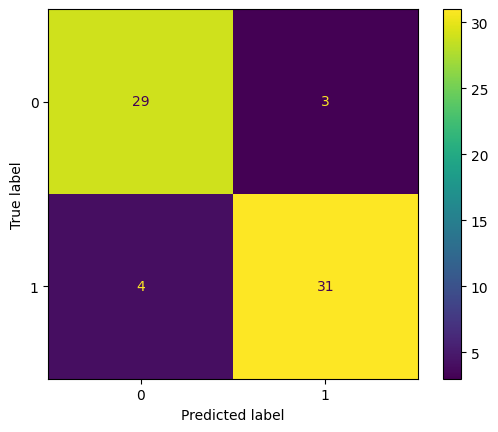

In [374]:
#Plotting the Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [375]:
from sklearn.model_selection import GridSearchCV

In [376]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100],  
              'kernel': ['linear','rbf','sigmoid']}  
   
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions)) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'C': 0.1, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        33
           1       0.89      0.91      0.90        34

    accuracy                           0.90        67
   macro avg       0.90      0.90      0.90        67
weighted avg       0.90      0.90      0.90        67

[CV 2/5] END .................C=0.1, kernel=rbf;, score=0.611 total time=   0.0s
[CV 1/5] END .............C=0.1, kernel=sigmoid;, score=0.500 total time=   0.0s
[CV 3/5] END .............C=0.1, kernel=sigmoid;, score=0.396 total time=   0.0s
[CV 5/5] END .............C=0.1, kernel=sigmoid;, score=0.491 total time=   0.0s
[CV 3/5] END ................C=1, kernel=linear;, score=0.887 total time=   0.8s
[CV 3/5] END ..............C=100, kernel=linear;, score=0.849 total time=   2.2s
[CV 2/5] END .................C=0.1, kernel=rbf;, score=0.611 total time=   0.0s
[CV 5/5] END .

[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.889 total time=   0.3s
[CV 1/5] END ...................C=1, kernel=rbf;, score=0.574 total time=   0.0s
[CV 2/5] END ...................C=1, kernel=rbf;, score=0.593 total time=   0.0s
[CV 3/5] END ...................C=1, kernel=rbf;, score=0.566 total time=   0.0s
[CV 4/5] END ...................C=1, kernel=rbf;, score=0.604 total time=   0.0s
[CV 5/5] END ...................C=1, kernel=rbf;, score=0.623 total time=   0.0s
[CV 1/5] END ...............C=1, kernel=sigmoid;, score=0.444 total time=   0.0s
[CV 2/5] END ...............C=1, kernel=sigmoid;, score=0.389 total time=   0.0s
[CV 3/5] END ...............C=1, kernel=sigmoid;, score=0.396 total time=   0.0s
[CV 4/5] END ...............C=1, kernel=sigmoid;, score=0.396 total time=   0.0s
[CV 5/5] END ...............C=1, kernel=sigmoid;, score=0.377 total time=   0.0s
[CV 2/5] END ...............C=10, kernel=linear;, score=0.870 total time=   0.4s
[CV 1/5] END ...............